# Interprétez votre partition
## Visualisez vos données

Effectuer un clustering puis sur les points puis les projetter sur premier plan factoriel n'est pas equivalent à effectuer un clustering sur la projection des points dans le premier plan factoriel qui donne une représentation moins intuitive.


**note** : Les centroïdes étant des points à p dimensions sont représentables mais ne doivent pas être pris en compte lors du calcul des axes principaux d'inertie.On calcule juste leurs projections pour les afficher.

## Pratique

In [2]:
# Importons nos librairies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [3]:
# On charge le dataset iris
iris = datasets.load_iris()

# On recupère la matrice X
X = iris.data

# On transfçorme X en dataframe
X = pd.DataFrame(X)

# On affiche les 5 premières lignes de X
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Effectuons notre clustering

In [4]:
# On instancie notre k-means avec 3 clusters
kmeans = KMeans(n_clusters=3)

# On l'entraine sur les données de la matrice X
kmeans.fit(X)

# On stocke nos clusters dans une variable labels
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Stockage des centroïdes

In [5]:
centroids =kmeans.cluster_centers_
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

Passons à l'ACP

In [19]:
# Instanciation de notre scaler
scaler = StandardScaler()

# Récuperation de la matrice centrée et réduite
X_scaled=scaler.fit_transform(X)

# Instanciation de notre PCA
pca = PCA(n_components=3)

# Entrainement du PCA avec X_scaled
pca.fit(X_scaled)

# Obtention de la matrice des points projetés
X_proj = pca.transform(X_scaled)

# Transformation de X_proj en dataframe
X_proj = pd.DataFrame(X_proj,columns=["PC1","PC2","PC3"])
X_proj[:5]



,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


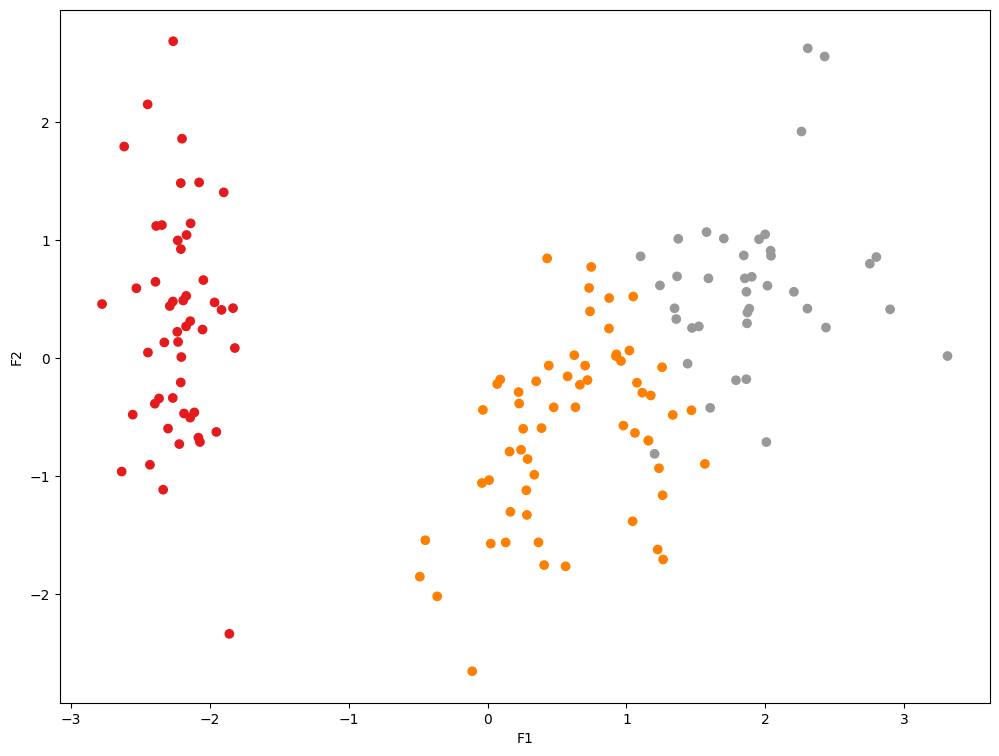

In [ ]:
# Affichage de nos points
fig,ax = plt.subplots(1,1,figsize=(12,9))
ax.scatter(X_proj.iloc[:,0],X_proj.iloc[:,1],c=labels,cmap='Set1')
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()




On s'interesse aux centroïdes avant la suite

In [29]:
# On utilise  bien le scaler déjà entrainé
centroids_scaled = scaler.fit_transform(centroids)

# On utilise l'ACP déjà entrainé
centroids_proj = pca.transform(centroids_scaled)

centroids_proj
# On tranforme en dataframe pour plus de clarté
centroids_proj = pd.DataFrame(centroids_proj,columns=["F1","F2","F3"],index=["cluster_0","cluster_1","cluster_2"])


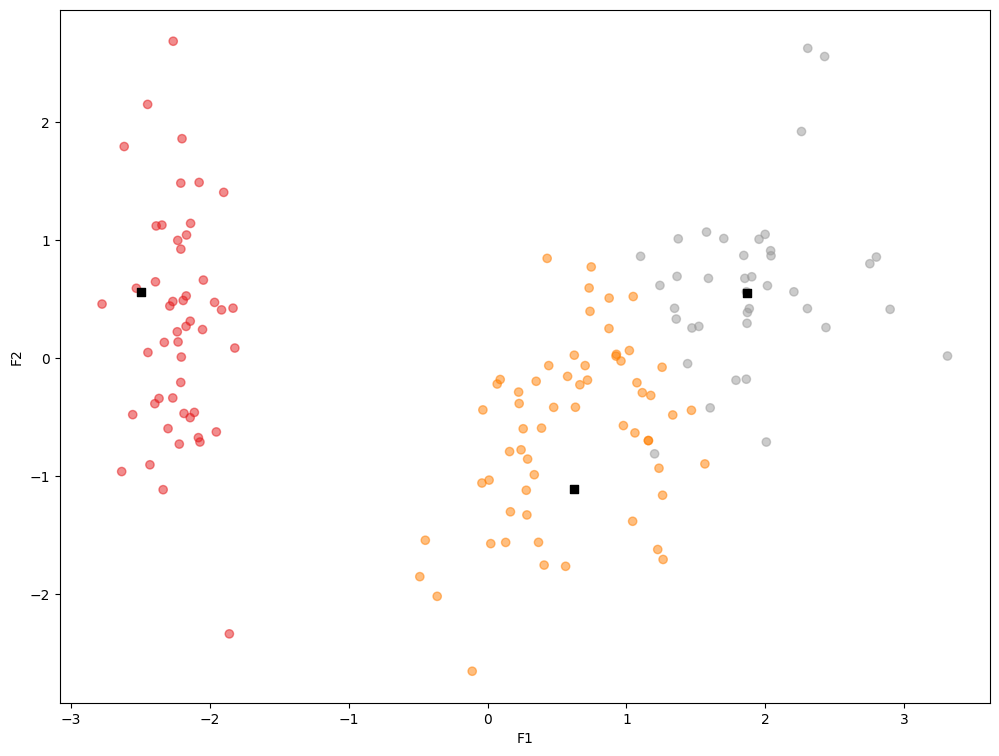

In [ ]:
# On définit notre figure et notre axe
fig,ax = plt.subplots(1,1,figsize=(12,9))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) :
ax.scatter(X_proj.iloc[:,0],X_proj.iloc[:,1],c=labels,alpha=0.5,cmap="Set1")

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") :
ax.scatter(centroids_proj.iloc[:,0],centroids_proj.iloc[:,1],color="black",marker="s")

# On spécifie nos axes x et y
ax.set_xlabel("F1")
ax.set_ylabel("F2")

plt.show()

Voyons voir ce que ça donne en 3 dimensions

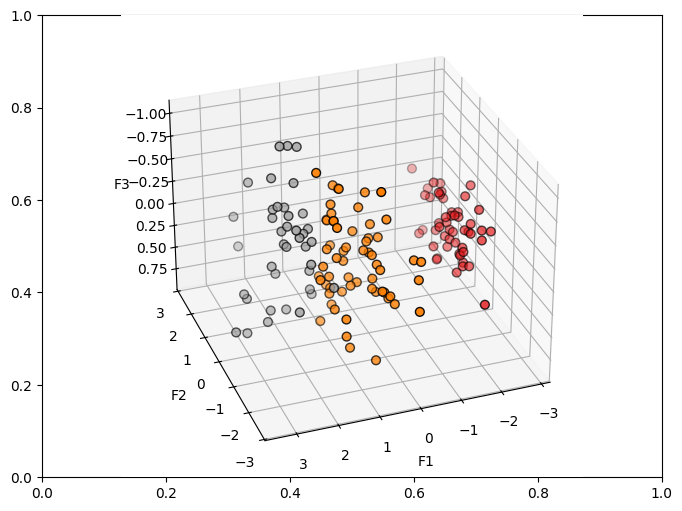

In [34]:
# On définit notre figure et notre axe
fig, ax = plt.subplots(1, figsize=(8, 6))
ax = fig.add_subplot(111,projection="3d",elev=-150,azim=110)

# On affiche nos points
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels,
    cmap="Set1", edgecolor="k", s=40)



# On spécifie nos axes x , y et z
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

plt.show()

## Les pièges de la visualisation

Le travail sur la visualisation peut être chronophage , il faut donc faire attention à ne pas trop s'y attarder.

## D'autres méthodes de projection
Dans des cas précis et assez rare on peut utiliser d'autres méthodes de reduction de dimension comme : 

- TNS-E
- LDA
- TSVD